**Contents**

1. read raw XML data from online database at saramusik.org
2. parse text content and metadata from XML data and store everything in a dataframe. Also the text content of each document is stored in a separate text file.
3. visualize and cleanup metadata fields
4. save dataframe of the parsed data and store in a pickle file

**Note:** re-run this file every once in a while because remote data is constantly being updated

In [1]:
# Configuration parameters

ROOT_URL = 'http://saramusik.org/'
XML_FILEPATH = '../data/xml_files/'
TEXT_FILEPATH = '../data/scraped_text/'
DOC_PARSED_DATA_FILEPATH = '../pickle_files/doc_parsed_data.pickle'
MIN_DOC_LEN = 100
OVERWRITE_TEXT_DATA_FLAG = False

In [2]:
import os.path

In [3]:
import pandas as pd

## Read and parse raw XML data

In [4]:
import xml.etree.ElementTree as ET
import urllib3
from xml.etree.ElementTree import ParseError

In [5]:
http = urllib3.PoolManager()

In [6]:
(not os.path.exists(DOC_PARSED_DATA_FILEPATH)) | OVERWRITE_TEXT_DATA_FLAG

True

In [9]:
## 1) get raw xml content either from online db
## 2) scrape document's textual content and metadata from raw xml content

import os

if (not os.path.exists(DOC_PARSED_DATA_FILEPATH)) | OVERWRITE_TEXT_DATA_FLAG:
    doc_data_list = []

    for i in range(5,700):

        ## request raw xml file from online database via http request
        hyperlink = ROOT_URL + str(i) + '/textei/'
        r = http.request('GET', hyperlink)
        root = ET.fromstring(r.data)

        ## scrape document's textual content and metadata from xml files
        try:

            ## scrape document's content from body section of the structured xml file
            lines = [elem.text.strip() for elem in root.findall(".//body//p")  if elem.text!=None]
            text_doc = '\n'.join(lines)

            print(f"URL: {hyperlink}\nNumber of lines: {len(lines)}\nNumber of characters: {len(text_doc)}\n")

            if len(text_doc) >= MIN_DOC_LEN:
                # write text content to a file
                text_file_name = str(i) + '.txt'
                text_file_path = TEXT_FILEPATH + text_file_name
                if not os.path.exists(text_file_path):
                    with open(text_file_path, "w", encoding='UTF8') as textfile:
                        textfile.write(text_doc)
                else:
                    print("text file {text_file_name} already exists.")

                ## scrape document metadata from head section
                _ = [elem.text.strip() for elem in root.findall(".//body//head")  if elem.text!=None]
                section_titles = [x[1:-1] for x in _]
                tags = [elem.text.strip() for elem in root.findall(".//textClass/keywords/term")  if elem.text!=None]
                author = [elem.text.strip() for elem in root.findall("./teiHeader/fileDesc/titleStmt/author/persName/surname")  if elem.text!=None]
                title = [elem.text.strip() for elem in root.findall("./teiHeader/fileDesc/titleStmt/title/*")  if elem.text!=None]
                source = [elem.text.strip() for elem in root.findall("./teiHeader/fileDesc/sourceDesc//country")  if elem.text!=None]

                doc_data_list.append((hyperlink,text_file_name,author,title,source,section_titles,tags,text_doc))

        except ParseError:
            print("Parse Error at ", hyperlink)
            print()
            continue

    print(f"{len(doc_data_list)} documents.")
    doc_data_df = pd.DataFrame(doc_data_list, columns=['hyperlink','filename','author','title','source','section_titles','tags','raw_text'])


URL: http://saramusik.org/5/textei/
Number of lines: 135
Number of characters: 22768

text file {text_file_name} already exists.
URL: http://saramusik.org/6/textei/
Number of lines: 133
Number of characters: 29858

text file {text_file_name} already exists.
URL: http://saramusik.org/7/textei/
Number of lines: 75
Number of characters: 12569

text file {text_file_name} already exists.
URL: http://saramusik.org/8/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/9/textei/
Number of lines: 142
Number of characters: 26213

text file {text_file_name} already exists.
URL: http://saramusik.org/10/textei/
Number of lines: 7
Number of characters: 1297

text file {text_file_name} already exists.
URL: http://saramusik.org/11/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/12/textei/
Number of lines: 2
Number of characters: 45

URL: http://saramusik.org/13/textei/
Number of lines: 44
Number of characters: 8374

text file {text_file_name} a

text file {text_file_name} already exists.
URL: http://saramusik.org/97/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/98/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/99/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/100/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/101/textei/
Number of lines: 1
Number of characters: 24

URL: http://saramusik.org/102/textei/
Number of lines: 1
Number of characters: 24

URL: http://saramusik.org/103/textei/
Number of lines: 1
Number of characters: 24

URL: http://saramusik.org/104/textei/
Number of lines: 1
Number of characters: 24

URL: http://saramusik.org/105/textei/
Number of lines: 1
Number of characters: 24

URL: http://saramusik.org/106/textei/
Number of lines: 5
Number of characters: 1957

text file {text_file_name} already exists.
URL: http://saramusik.org/107/textei/
Number of lines: 2
Number of characters: 47

UR

URL: http://saramusik.org/192/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/193/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/194/textei/
Number of lines: 137
Number of characters: 32693

text file {text_file_name} already exists.
URL: http://saramusik.org/195/textei/
Number of lines: 8
Number of characters: 4931

text file {text_file_name} already exists.
URL: http://saramusik.org/196/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/197/textei/
Number of lines: 7
Number of characters: 1790

text file {text_file_name} already exists.
URL: http://saramusik.org/198/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/199/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/200/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/201/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/202/tex

URL: http://saramusik.org/286/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/287/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/288/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/289/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/290/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/291/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/292/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/293/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/294/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/295/textei/
Number of lines: 11
Number of characters: 623

text file {text_file_name} already exists.
URL: http://saramusik.org/296/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/297/textei/
Numb

URL: http://saramusik.org/385/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/386/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/387/textei/
Number of lines: 2
Number of characters: 47

URL: http://saramusik.org/388/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/389/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/390/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/391/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/392/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/393/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/394/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/395/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/396/textei/
Number of lines: 1
Number of characters: 23

URL:

URL: http://saramusik.org/484/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/485/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/486/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/487/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/488/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/489/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/490/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/491/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/492/textei/
Number of lines: 1
Number of characters: 22

URL: http://saramusik.org/493/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/494/textei/
Number of lines: 1
Number of characters: 23

URL: http://saramusik.org/495/textei/
Number of lines: 1
Number of characters: 23

URL:

URL: http://saramusik.org/584/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/585/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/586/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/587/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/588/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/589/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/590/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/591/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/592/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/593/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/594/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/595/textei/
Number of lines: 0
Number of characters: 0

URL: http://sara

URL: http://saramusik.org/685/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/686/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/687/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/688/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/689/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/690/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/691/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/692/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/693/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/694/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/695/textei/
Number of lines: 0
Number of characters: 0

URL: http://saramusik.org/696/textei/
Number of lines: 0
Number of characters: 0

URL: http://sara

In [10]:
doc_data_df.shape

(39, 8)

In [11]:
doc_data_df.head()

,hyperlink,filename,author,title,source,section_titles,tags,raw_text
0,http://saramusik.org/5/textei/,5.txt,[يعقوب بن إسحاق الكندي],"[رسالة في خبر صناعة التّأليف, risāla fī ẖabar ...",[بريطانيا العظمى],"[1 , تبيا, النّغم المتشابه في الكيفيّة, تمثيل ...","[المدرسة الأفلاطونيّة المتجدّدة, الموسيقى والف...",[بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة من...
1,http://saramusik.org/6/textei/,6.txt,[يعقوب بن إسحاق الكندي],[كتاب المصوّتات الوتريّة من ذات الوتر الواحد إ...,[بريطانيا العظمى],[لمقالة الأولى : في ذكر الآلات الصّوتيّة وسائر...,"[المدرسة الأفلاطونيّة المتجدّدة, الموسيقى والف...",[اعتمادا على تحقيق زكريّا يوسف]\n\nأَطَالَ الَ...
2,http://saramusik.org/7/textei/,7.txt,[يعقوب بن إسحاق الكندي],"[رسالة في أجزاء خبريّة في الموسيقى, risāla fī ...","[ألمانيا, تونس, ألمانيا]","[مقدّمة, لمقالة الأول, لمقالة الثّاني, لمقالة ...",[المدرسة الأفلاطونيّة المتجدّدة],أنار إليه من خفيّات الأمور بموضحات الرّسوم أفض...
3,http://saramusik.org/9/textei/,9.txt,[يعقوب بن إسحاق الكندي],"[رسالة الكندي في اللّحون والنّغم, Risālat al-k...","[ألمانيا, تركيا, ألمانيا]","[مقدّمة, لفنّ الأوّل : [في تركيب العود وقسمة ا...",[المدرسة الأفلاطونيّة المتجدّدة],بِسْمِ اللَّهِ الرَّحْمَانِ الرَّحِيمِ\nوَمَا ...
4,http://saramusik.org/10/textei/,10.txt,[صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي],"[كتاب الأدوار, Kitāb al-Adwār]","[تونس, تونس, نمسا, سعوديّة, مصر, مصر, مصر, مصر...","[مقدّمة, ِي تَعْرِيفِ النَّغَمِ وَبَيَانِ الحِ...","[المدرسة الأرمويّة, نظريّات موسيقيّة]",الدَّسَاتِينُ هِيَ عَلَامَاتٌ تُوضَعُ عَلَى سَ...


***

##  Visualize and cleanup meta data fields

In [12]:
import arabic_reshaper
from bidi.algorithm import get_display

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

### title field

In [14]:
doc_data_df.title.map(len).value_counts()

2    37
1     2
Name: title, dtype: int64

In [15]:
doc_data_df.title[doc_data_df.title.map(len)==1]

24      [رسالة القيان]
25    [طبقات المغنّين]
Name: title, dtype: object

In [16]:
#doc_data_df['title_clean'] = doc_data_df.title.map(lambda x: [y for y in x if y!='None'])
doc_data_df['title_clean'] = doc_data_df.title.map(lambda x: x if len(x)==2 else x+['None'])
doc_data_df['title_arabic'] = doc_data_df.title_clean.map(lambda x: x[0])
doc_data_df['title_latin_translit'] = doc_data_df.title_clean.map(lambda x: x[1])
doc_data_df[['title_clean','title_arabic','title_latin_translit']]

,title_clean,title_arabic,title_latin_translit
0,"[رسالة في خبر صناعة التّأليف, risāla fī ẖabar ...",رسالة في خبر صناعة التّأليف,risāla fī ẖabar ṣināʿat al-taʾlīf
1,[كتاب المصوّتات الوتريّة من ذات الوتر الواحد إ...,كتاب المصوّتات الوتريّة من ذات الوتر الواحد إل...,kitāb al-muṣawwiṭāt al-watariyya min ḍāt al-wa...
2,"[رسالة في أجزاء خبريّة في الموسيقى, risāla fī ...",رسالة في أجزاء خبريّة في الموسيقى,risāla fī aǧzāʾ ẖabariyya fī al-mūsīqā
3,"[رسالة الكندي في اللّحون والنّغم, Risālat al-k...",رسالة الكندي في اللّحون والنّغم,Risālat al-kindī fī al-luhūn wa al-naġam
4,"[كتاب الأدوار, Kitāb al-Adwār]",كتاب الأدوار,Kitāb al-Adwār
5,"[قول على اللّحون وصنعة المعازف ومخارج الحروف, ...",قول على اللّحون وصنعة المعازف ومخارج الحروف,Qawl ʿalā al-luḥūn wa ṣanʿat al-maʿāzif wa maẖ...
6,"[كتاب النّغم, Kitāb al-Naġam]",كتاب النّغم,Kitāb al-Naġam
7,"[كتاب الشّفاء, Kitāb al-šifā]",كتاب الشّفاء,Kitāb al-šifā
8,"[مسألة في الموسيقى, Masʾala fīʼl-mūsīḳā]",مسألة في الموسيقى,Masʾala fīʼl-mūsīḳā
9,[كتاب عنصر الموسيقى وما افترقت عليه الفلاسفة م...,كتاب عنصر الموسيقى وما افترقت عليه الفلاسفة من...,None


In [17]:
assert doc_data_df.title_clean.map(len).nunique()==1

In [18]:
doc_data_df.title_latin_translit.value_counts().head()

None                                        17
Šarḥ kitāb al-adwār                          1
risāla fī ẖabar ṣināʿat al-taʾlīf            1
Risālat al-kindī fī al-luhūn wa al-naġam     1
Kitāb al-Lahw wa al-Malāhī                   1
Name: title_latin_translit, dtype: int64

### tag field

In [19]:
doc_data_df.tags.map(len).describe()

count    39.000000
mean      1.435897
std       0.852083
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: tags, dtype: float64

In [20]:
# how many documents have no tags?
idx=doc_data_df.tags.map(len)==0
print(idx.sum())

1


In [21]:
# which documents have no tags?
doc_data_df[idx].title_arabic

31    كتاب اللهو والملاهي
Name: title_arabic, dtype: object

In [22]:
tags_list = doc_data_df.tags.tolist()
tags_flat_list = [y for x in tags_list for y in x]
tags_distinct = sorted(list(set(tags_flat_list)))

In [23]:
list(map(len,[tags_list,tags_flat_list,tags_distinct]))

[39, 56, 18]

In [24]:
tags_list[0:5]

[['المدرسة الأفلاطونيّة المتجدّدة', 'الموسيقى والفلسفة'],
 ['المدرسة الأفلاطونيّة المتجدّدة', 'الموسيقى والفلسفة'],
 ['المدرسة الأفلاطونيّة المتجدّدة'],
 ['المدرسة الأفلاطونيّة المتجدّدة'],
 ['المدرسة الأرمويّة', 'نظريّات موسيقيّة']]

In [25]:
tags_distinct

['إعادة التّحديد',
 'الآلات الموسيقيّة',
 'الأخبار والإخبار والأعلام',
 'التصوّف والسماع',
 'التّاريخ والتّأريخ (التّوثيق)',
 'المدرسة الأرمويّة',
 'المدرسة الأفلاطونيّة المتجدّدة',
 'المدرسة الفارابيّة',
 'المدرسة المغاربيّة الحديثة',
 'المدرسة المغاربيّة القديمة',
 'الموسيقى والطّبّ',
 'الموسيقى والفلسفة',
 'النصوص الأندلسيّة',
 'النّصوص الأدبيّة الخبريّة',
 'مدرسة الأراجيز والأنغام',
 'مدرسة سمرقند',
 'نصوص إغريقيّة مترجمة',
 'نظريّات موسيقيّة']

In [26]:
pd.Series(tags_flat_list).value_counts()

المدرسة الأفلاطونيّة المتجدّدة    10
مدرسة الأراجيز والأنغام            7
المدرسة الفارابيّة                 7
النّصوص الأدبيّة الخبريّة          5
نظريّات موسيقيّة                   4
الموسيقى والفلسفة                  4
المدرسة المغاربيّة القديمة         3
النصوص الأندلسيّة                  3
المدرسة المغاربيّة الحديثة         2
المدرسة الأرمويّة                  2
إعادة التّحديد                     2
نصوص إغريقيّة مترجمة               1
التّاريخ والتّأريخ (التّوثيق)      1
التصوّف والسماع                    1
الموسيقى والطّبّ                   1
الآلات الموسيقيّة                  1
الأخبار والإخبار والأعلام          1
مدرسة سمرقند                       1
dtype: int64

In [28]:
# for graphic visualization purposes

reshaped_tags = [get_display(arabic_reshaper.reshape(x)) for x in tags_distinct]
reshaped_tags_flat_list = [get_display(arabic_reshaper.reshape(x)) for x in tags_flat_list]

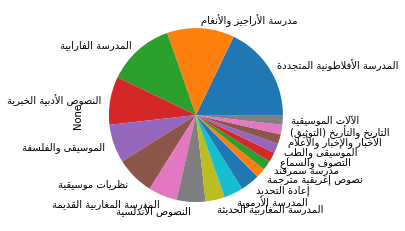

In [29]:
pd.Series(reshaped_tags_flat_list).value_counts().plot(kind='pie')

In [30]:
doc_tags_mat = pd.np.zeros((len(tags_list),len(tags_distinct)))

for i,x in enumerate(tags_list):
    for j,y in enumerate(tags_distinct):
        if y in x:
            doc_tags_mat[i,j] = 1

doc_tags_mat.shape

(39, 18)

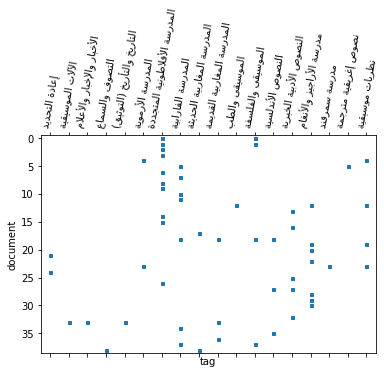

In [31]:
plt.spy(doc_tags_mat,precision=0, markersize=3, aspect='auto')
plt.xlabel('tag')
plt.ylabel('document')
u=plt.xticks(list(range(len(tags_distinct))), reshaped_tags, rotation=80)
#plt.title('Frequency counts')

In [32]:
doc_tags_df = pd.DataFrame(doc_tags_mat, columns=tags_distinct, index=doc_data_df.title_arabic)
doc_tags_df.shape

(39, 18)

In [33]:
# Distribution of frequency of occurrence of tags

doc_tags_df.sum(axis=0).value_counts()

1.0     7
2.0     3
4.0     2
3.0     2
7.0     2
5.0     1
10.0    1
dtype: int64

In [34]:
# most frequent tags

doc_tags_df.sum(axis=0).sort_values(ascending=False).head(10)

المدرسة الأفلاطونيّة المتجدّدة    10.0
المدرسة الفارابيّة                 7.0
مدرسة الأراجيز والأنغام            7.0
النّصوص الأدبيّة الخبريّة          5.0
نظريّات موسيقيّة                   4.0
الموسيقى والفلسفة                  4.0
النصوص الأندلسيّة                  3.0
المدرسة المغاربيّة القديمة         3.0
المدرسة الأرمويّة                  2.0
المدرسة المغاربيّة الحديثة         2.0
dtype: float64

In [35]:
# Distribution of number of tags per document

doc_tags_df.sum(axis=1).value_counts()

1.0    26
2.0     8
4.0     2
3.0     2
0.0     1
dtype: int64

In [36]:
# documents with the most tags

doc_tags_df.sum(axis=1).sort_values(ascending=False).head(7)

title_arabic
المقدّمة : صناعة الغناء                                             4.0
كتاب النّفس : القول في السّمع                                       4.0
برء الأسقام، شرح القصيدة في الأنغام                                 3.0
شرح كتاب الأدوار                                                    3.0
المواهب الخيريّة في كيفيّة عمل البردة البصيريّة                     2.0
العقد الفريد                                                        2.0
كتاب المصوّتات الوتريّة من ذات الوتر الواحد إلى ذات العشرة أوتار    2.0
dtype: float64

In [37]:
# documents with NO tags

doc_tags_df[doc_tags_df.sum(axis=1)==0].index.tolist()

['كتاب اللهو والملاهي']

Text(310.8111538461539, 0.5, 'document title')

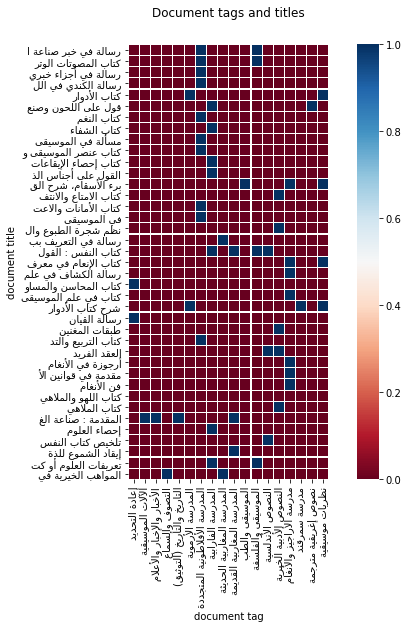

In [38]:
# visualize doc-tag matrix as a heatmap

reshaped_titles = [get_display(arabic_reshaper.reshape(x[0:20])) for x in doc_data_df.title_arabic.tolist()]
doc_tags_df2 = pd.DataFrame(doc_tags_mat, columns=reshaped_tags, index=reshaped_titles)

plt.figure(figsize=(10,8))
plt.title('Document tags and titles', y=1.05, size=12)
sns.heatmap(doc_tags_df2, linewidths=0.1, square=True, linecolor='white', annot=False, cmap=plt.cm.RdBu)
plt.xlabel('document tag')
plt.ylabel('document title')

In [39]:
# remove documents that contain 0 tags

idx = doc_tags_df.sum(axis=1)==0
print(idx.sum())
doc_tags_df_sub = doc_tags_df[~idx]
doc_tags_df.shape,doc_tags_df_sub.shape

1


((39, 18), (38, 18))

Text(76.64500000000001, 0.5, 'tag')

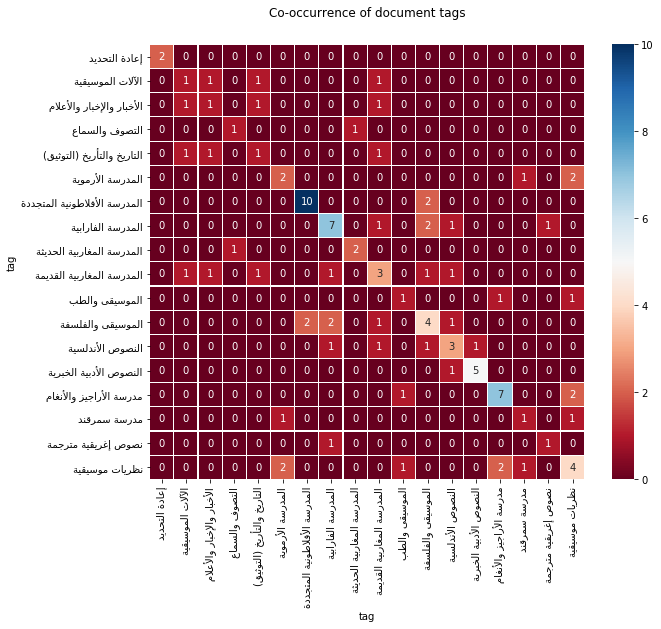

In [40]:
# Co-occurrence matrix of tags heatmap

C2 = pd.DataFrame(pd.np.asmatrix(doc_tags_df_sub.T)*pd.np.asmatrix(doc_tags_df_sub))
C2.index = reshaped_tags
C2.columns = reshaped_tags

plt.figure(figsize=(10,8))
plt.title('Co-occurrence of document tags', y=1.05, size=12)
sns.heatmap(C2, linewidths=0.1, square=True, linecolor='white', annot=True, cmap=plt.cm.RdBu)
plt.xlabel('tag')
plt.ylabel('tag')

Text(76.64500000000001, 0.5, 'tag')

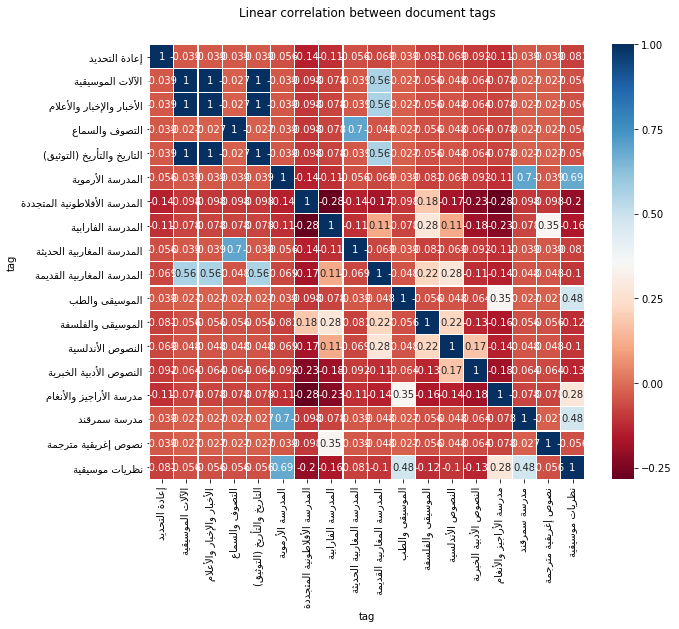

In [41]:
## Correlation matrix between tags as a heatmap

C = doc_tags_df_sub.corr()
C.index = reshaped_tags
C.columns = reshaped_tags
assert C.shape[0]==len(reshaped_tags) and C.shape[0]==C.shape[1]

plt.figure(figsize=(10,8))
plt.title('Linear correlation between document tags', y=1.05, size=12)
sns.heatmap(C, linewidths=0.1, square=True, linecolor='white', annot=True, cmap=plt.cm.RdBu)
plt.xlabel('tag')
plt.ylabel('tag')

In [42]:
## tags that are perfectly correlated

doc_tags_df.columns[(C==1).sum()>1].tolist()

['الآلات الموسيقيّة',
 'الأخبار والإخبار والأعلام',
 'التّاريخ والتّأريخ (التّوثيق)']

In [43]:
## PCA of tags co-occurrence matrix (just for fun!)

from sklearn.decomposition import TruncatedSVD

In [44]:
X = doc_tags_df_sub
X.shape

(38, 18)

In [45]:
svd = TruncatedSVD(n_components=17, n_iter=7, random_state=42)
X_pca = svd.fit_transform(X)
X_pca.shape

(38, 17)

In [46]:
svd.explained_variance_ratio_[0:5]

array([0.13524262, 0.16368204, 0.13660559, 0.10065192, 0.09695375])

In [47]:
print(svd.explained_variance_ratio_.sum())

1.0000000000000004


In [48]:
svd.explained_variance_ratio_.cumsum()[-5:]

array([0.97785471, 0.98721114, 0.99509479, 1.        , 1.        ])

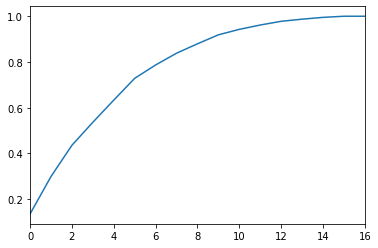

In [49]:
pd.Series(svd.explained_variance_ratio_.cumsum()).plot()

**Remark**

- 3 tags are perfectly correlated: 

        الآلات الموسيقيّة
         الأخبار والإخبار والأعلام
         التّاريخ والتّأريخ (التّوثيق)
 
- we will merge them into a single tag

In [50]:
doc_data_df.tags.head()

0    [المدرسة الأفلاطونيّة المتجدّدة, الموسيقى والف...
1    [المدرسة الأفلاطونيّة المتجدّدة, الموسيقى والف...
2                     [المدرسة الأفلاطونيّة المتجدّدة]
3                     [المدرسة الأفلاطونيّة المتجدّدة]
4                [المدرسة الأرمويّة, نظريّات موسيقيّة]
Name: tags, dtype: object

In [51]:
doc_data_df.tags.value_counts()

[المدرسة الأفلاطونيّة المتجدّدة]                                                                             8
[مدرسة الأراجيز والأنغام]                                                                                    5
[النّصوص الأدبيّة الخبريّة]                                                                                  4
[المدرسة الفارابيّة]                                                                                         4
[المدرسة الأفلاطونيّة المتجدّدة, الموسيقى والفلسفة]                                                          2
[إعادة التّحديد]                                                                                             2
[المدرسة المغاربيّة الحديثة]                                                                                 1
[المدرسة الفارابيّة, المدرسة المغاربيّة القديمة, الموسيقى والفلسفة, النصوص الأندلسيّة]                       1
[المدرسة المغاربيّة الحديثة, التصوّف والسماع]                                                                1
[

In [52]:
## merge equivalent tags into a single tag

special_list = ['الآلات الموسيقيّة', 'الأخبار والإخبار والأعلام', 'التّاريخ والتّأريخ (التّوثيق)']
special_list[0]

'الآلات الموسيقيّة'

In [53]:
doc_data_df['tags'] = doc_data_df.tags.map(lambda tags_list: [special_list[0] if x in special_list else x for x in tags_list] )

In [54]:
doc_data_df['tags'] = doc_data_df.tags.map(lambda tags_list: list(set(tags_list)))

In [55]:
doc_data_df.tags.value_counts()

[المدرسة الأفلاطونيّة المتجدّدة]                                                          8
[مدرسة الأراجيز والأنغام]                                                                 5
[النّصوص الأدبيّة الخبريّة]                                                               4
[المدرسة الفارابيّة]                                                                      4
[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتجدّدة]                                       2
[إعادة التّحديد]                                                                          2
[المدرسة المغاربيّة الحديثة]                                                              1
[المدرسة الفارابيّة, الموسيقى والفلسفة, النصوص الأندلسيّة, المدرسة المغاربيّة القديمة]    1
[التصوّف والسماع, المدرسة المغاربيّة الحديثة]                                             1
[نظريّات موسيقيّة, مدرسة الأراجيز والأنغام]                                               1
[نظريّات موسيقيّة, المدرسة الأرمويّة]                                           

***

### author field

In [56]:
doc_data_df.author.head()

0                            [يعقوب بن إسحاق الكندي]
1                            [يعقوب بن إسحاق الكندي]
2                            [يعقوب بن إسحاق الكندي]
3                            [يعقوب بن إسحاق الكندي]
4    [صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي]
Name: author, dtype: object

In [57]:
doc_data_df.author.map(len).value_counts()

1    39
Name: author, dtype: int64

In [58]:
doc_data_df['author'] = doc_data_df.author.map(lambda x: x[0])

In [59]:
doc_data_df.author.head()

0                            يعقوب بن إسحاق الكندي
1                            يعقوب بن إسحاق الكندي
2                            يعقوب بن إسحاق الكندي
3                            يعقوب بن إسحاق الكندي
4    صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي
Name: author, dtype: object

In [60]:
doc_data_df.author.value_counts()

يعقوب بن إسحاق الكندي                                               4
أبو عثمان عمر بن بحر الفُقيمي البصري الجاحظ                         3
أبو نصر محمد بن محمد بن طرخان اوزلغ الفارابي                        2
أبو أحمد يحيى بن علي بن يحيى بن المنجم                              1
محمّد البوعصامي                                                     1
مجهول 7                                                             1
مبارك شاه                                                           1
أبو الحسن بن مروان ثابت بن قرّة                                     1
عبد اللّه المصوّر بن حسين المظفّر الحصكفي الموسيقي                  1
أبو طالب بن عاصم الضبي مفضّل بن سلمة                                1
إقليدس                                                              1
أبو علي الحسين بن عبد الله ابن سينا                                 1
أبو عبد اللّه محمّد بن عمر بن سليمان بن عبد اللّه بن الدّرّاج       1
عبد القادر بن محمود القادري                                         1
صفي الدّين عبد المؤم

### source field

In [61]:
doc_data_df.source.head()

0                                    [بريطانيا العظمى]
1                                    [بريطانيا العظمى]
2                             [ألمانيا, تونس, ألمانيا]
3                            [ألمانيا, تركيا, ألمانيا]
4    [تونس, تونس, نمسا, سعوديّة, مصر, مصر, مصر, مصر...
Name: source, dtype: object

In [62]:
doc_data_df.source.map(lambda x: list(set(x))).value_counts()

[تركيا]                                                                                                    7
[ألمانيا]                                                                                                  5
[تونس]                                                                                                     4
[بريطانيا العظمى, تركيا]                                                                                   3
[بريطانيا العظمى]                                                                                          3
[تركيا, ألمانيا]                                                                                           2
[بريطانيا العظمى, هند]                                                                                     1
[اسبانيا]                                                                                                  1
[تركيا, ألمانيا, بريطانيا العظمى, نمسا, هولاندا]                                                           1
[]                 

### raw text field

In [63]:
u = doc_data_df.raw_text.map(len)
u.describe()

count       39.000000
mean     13900.769231
std      15820.373572
min        549.000000
25%       3992.500000
50%       8374.000000
75%      19495.500000
max      75161.000000
Name: raw_text, dtype: float64

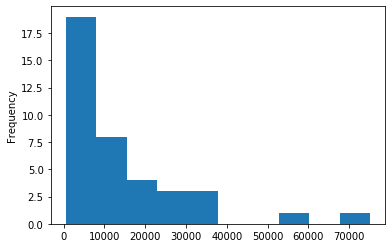

In [64]:
u.plot.hist()

****

## Save meta data to a file

In [65]:
doc_data_df.columns

Index(['hyperlink', 'filename', 'author', 'title', 'source', 'section_titles',
       'tags', 'raw_text', 'title_clean', 'title_arabic',
       'title_latin_translit'],
      dtype='object')

In [66]:
selected_fields = ['hyperlink', 'filename', 'author', 'source', 'title_arabic', 'title_latin_translit','tags','section_titles','raw_text']

In [67]:
doc_data_df[selected_fields].head()

,hyperlink,filename,author,source,title_arabic,title_latin_translit,tags,section_titles,raw_text
0,http://saramusik.org/5/textei/,5.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],رسالة في خبر صناعة التّأليف,risāla fī ẖabar ṣināʿat al-taʾlīf,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...","[1 , تبيا, النّغم المتشابه في الكيفيّة, تمثيل ...",[بالاعتماد على تحقيق يوسف شوقي.]\n[الرّسالة من...
1,http://saramusik.org/6/textei/,6.txt,يعقوب بن إسحاق الكندي,[بريطانيا العظمى],كتاب المصوّتات الوتريّة من ذات الوتر الواحد إل...,kitāb al-muṣawwiṭāt al-watariyya min ḍāt al-wa...,"[الموسيقى والفلسفة, المدرسة الأفلاطونيّة المتج...",[لمقالة الأولى : في ذكر الآلات الصّوتيّة وسائر...,[اعتمادا على تحقيق زكريّا يوسف]\n\nأَطَالَ الَ...
2,http://saramusik.org/7/textei/,7.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تونس, ألمانيا]",رسالة في أجزاء خبريّة في الموسيقى,risāla fī aǧzāʾ ẖabariyya fī al-mūsīqā,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لمقالة الأول, لمقالة الثّاني, لمقالة ...",أنار إليه من خفيّات الأمور بموضحات الرّسوم أفض...
3,http://saramusik.org/9/textei/,9.txt,يعقوب بن إسحاق الكندي,"[ألمانيا, تركيا, ألمانيا]",رسالة الكندي في اللّحون والنّغم,Risālat al-kindī fī al-luhūn wa al-naġam,[المدرسة الأفلاطونيّة المتجدّدة],"[مقدّمة, لفنّ الأوّل : [في تركيب العود وقسمة ا...",بِسْمِ اللَّهِ الرَّحْمَانِ الرَّحِيمِ\nوَمَا ...
4,http://saramusik.org/10/textei/,10.txt,صفي الدّين عبد المؤمن أبو يوسف بن فخر الأرموي,"[تونس, تونس, نمسا, سعوديّة, مصر, مصر, مصر, مصر...",كتاب الأدوار,Kitāb al-Adwār,"[نظريّات موسيقيّة, المدرسة الأرمويّة]","[مقدّمة, ِي تَعْرِيفِ النَّغَمِ وَبَيَانِ الحِ...",الدَّسَاتِينُ هِيَ عَلَامَاتٌ تُوضَعُ عَلَى سَ...


In [68]:
(not os.path.exists(DOC_PARSED_DATA_FILEPATH)) | OVERWRITE_TEXT_DATA_FLAG

True

In [69]:
if (not os.path.exists(DOC_PARSED_DATA_FILEPATH)) | OVERWRITE_TEXT_DATA_FLAG:
    import pickle
    with open(DOC_PARSED_DATA_FILEPATH, 'wb') as f:
        pickle.dump(doc_data_df[selected_fields], f)